In this jupyter notebook, we use the Covid-19 dataset provided by John Hopkins University Center for Systems Science and Engineerinig (JHU CSSE) which is provided to the public strictly for educational and academic research purposes.
This data is for USA

In [2]:
# Import all the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

# Set the URL to the GitHub repository and load the data

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
data_raw = pd.read_csv( url)

In [3]:
# Display the first 5 rows of the raw data
data_raw.head(n=6)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2197,2212,2230,2242,2267,2283,2304,2328,2351,2385
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,6995,7061,7097,7134,7188,7226,7263,7348,7409,7454
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1074,1079,1080,1090,1092,1095,1098,1107,1112,1113
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,890,897,907,917,924,926,932,948,961,966
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2162,2188,2222,2253,2286,2297,2335,2378,2400,2429
5,84001011,US,USA,840,1011.0,Bullock,Alabama,US,32.100305,-85.712655,...,657,659,661,662,663,664,664,665,668,669


In [4]:
# Display the last 5 rows of the raw data
data_raw.tail(n=6)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
3334,84056037,US,USA,840,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,...,621,638,658,681,692,726,776,852,869,944
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,862,873,897,922,932,977,1007,1022,1025,1066
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,510,518,529,542,544,551,568,614,627,664
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,2,0,0,0,0,0,0,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,167,175,179,188,185,187,190,197,199,203
3339,84056045,US,USA,840,56045.0,Weston,Wyoming,US,43.839612,-104.567488,...,181,189,203,294,296,306,310,321,323,321


In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Columns: 307 entries, UID to 11/12/20
dtypes: float64(3), int64(298), object(6)
memory usage: 7.8+ MB


We see that we have 306 columns but we can remove the unnecessary ones.

In [7]:
data_raw.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_',
       ...
       '11/3/20', '11/4/20', '11/5/20', '11/6/20', '11/7/20', '11/8/20',
       '11/9/20', '11/10/20', '11/11/20', '11/12/20'],
      dtype='object', length=307)

In [9]:
# We can choose a state to look into
is_state = data_raw["Province_State"] == "Massachusetts"
data = data_raw[is_state]

# Delete the unnecessary columns
del data["UID"]
del data["iso2"]
del data["iso3"]
del data["code3"]
del data["FIPS"]
del data["Province_State"]
del data["Country_Region"]
del data["Lat"]
del data["Long_"]
del data["Combined_Key"]

# Set the index to County column
data.set_index("Admin2", inplace=True)

In [10]:
# Display the data of the filtered dataframe
data.head(n=15)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20
Admin2,,,,,,,,,,,,,,,,,,,,,
Barnstable,0,0,0,0,0,0,0,0,0,0,...,2065,2078,2089,2111,2123,2139,2150,2180,2202,2210
Berkshire,0,0,0,0,0,0,0,0,0,0,...,808,814,818,829,838,845,861,903,953,982
Bristol,0,0,0,0,0,0,0,0,0,0,...,13010,13239,13440,13657,13876,14065,14171,14463,14827,15073
Dukes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dukes and Nantucket,0,0,0,0,0,0,0,0,0,0,...,266,272,283,289,306,321,324,337,359,375
Essex,0,0,0,0,0,0,0,0,0,0,...,24724,25065,25365,25741,26137,26490,26621,26889,27231,27678
Franklin,0,0,0,0,0,0,0,0,0,0,...,487,490,495,500,504,507,513,517,521,528
Hampden,0,0,0,0,0,0,0,0,0,0,...,10523,10651,10812,11007,11188,11356,11560,11727,11963,12149
Hampshire,0,0,0,0,0,0,0,0,0,0,...,1537,1559,1580,1604,1638,1659,1674,1693,1730,1761


In [11]:
data.columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '11/3/20', '11/4/20', '11/5/20', '11/6/20', '11/7/20', '11/8/20',
       '11/9/20', '11/10/20', '11/11/20', '11/12/20'],
      dtype='object', length=296)

We see that the data is from 22nd January to the current day of making the notebook, which is 12th November. 

## Plotting The Data

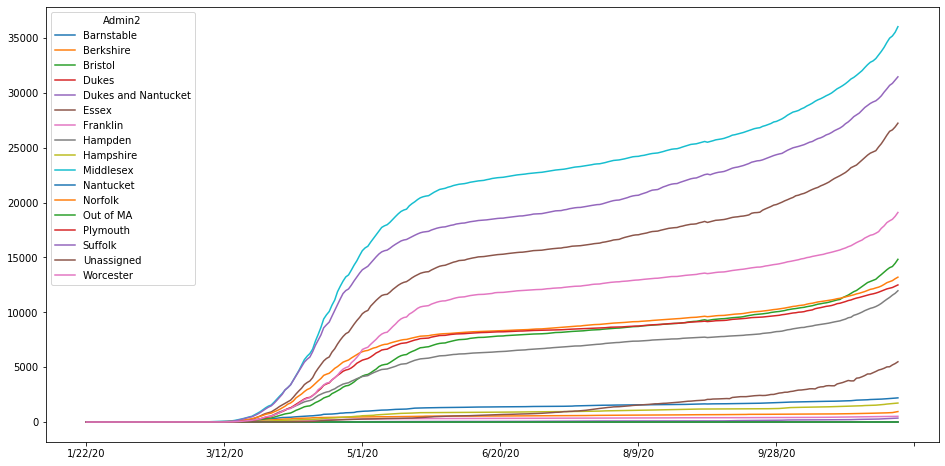

In [7]:
# Plot all the data of the different states
data.T.plot(figsize=(16,8))
plt.show()

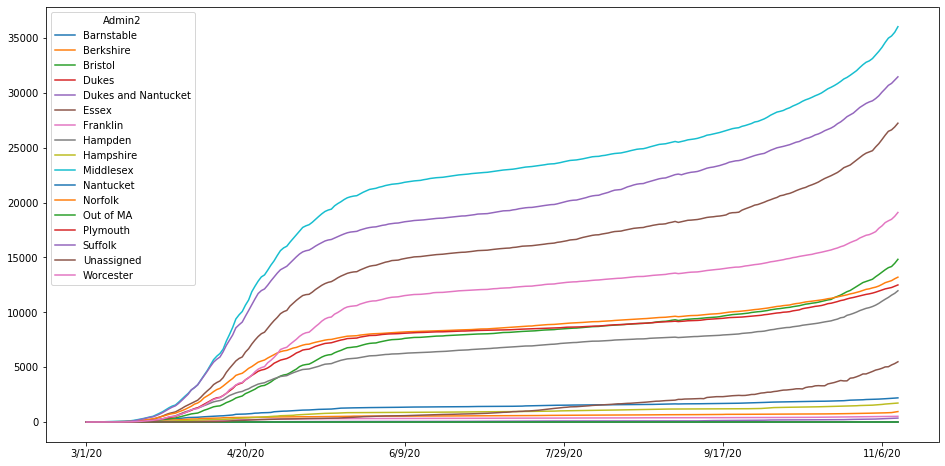

In [8]:
# Plot the data for March
data.T.loc['3/1/20':,:].plot(figsize=(16,8))
plt.show()

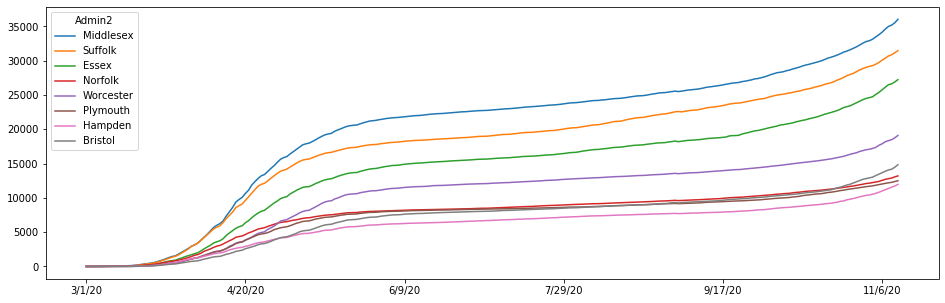

In [15]:
# Plot the data for March for the specified counties
data.T.loc['3/1/20':,['Middlesex', 'Suffolk', 'Essex', 'Norfolk', 'Worcester', 'Plymouth', 'Hampden', 'Bristol']].plot(figsize=(16,5))
plt.show()   

## Add Total Column To Data Frame

In [16]:
# Display the first 5 rows of the filtered data
data.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20
Admin2,,,,,,,,,,,,,,,,,,,,,
Barnstable,0,0,0,0,0,0,0,0,0,0,...,2060,2065,2078,2089,2111,2123,2139,2150,2180,2202
Berkshire,0,0,0,0,0,0,0,0,0,0,...,803,808,814,818,829,838,845,861,903,953
Bristol,0,0,0,0,0,0,0,0,0,0,...,12917,13010,13239,13440,13657,13876,14065,14171,14463,14827
Dukes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dukes and Nantucket,0,0,0,0,0,0,0,0,0,0,...,262,266,272,283,289,306,321,324,337,359


In [19]:
# Sum the values for each county
data_totals = data.sum(axis=1)

# Add a column called Totals with county tools
data['Totals'] = data_totals

# Display the first 5 rows of the dataframe
data.head()

C:\Users\Shannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,Totals
Admin2,,,,,,,,,,,,,,,,,,,,,
Barnstable,0,0,0,0,0,0,0,0,0,0,...,2065,2078,2089,2111,2123,2139,2150,2180,2202,327108
Berkshire,0,0,0,0,0,0,0,0,0,0,...,808,814,818,829,838,845,861,903,953,136621
Bristol,0,0,0,0,0,0,0,0,0,0,...,13010,13239,13440,13657,13876,14065,14171,14463,14827,1794986
Dukes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Dukes and Nantucket,0,0,0,0,0,0,0,0,0,0,...,266,272,283,289,306,321,324,337,359,23069


## Plot The Top 8 Counties

In [21]:
# filter the top 8 county totals
top = data.nlargest(8, 'Totals')

# Display the dataframe with highest cases
top.head(n=8)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,Totals
Admin2,,,,,,,,,,,,,,,,,,,,,
Middlesex,0,0,0,0,0,0,0,0,0,0,...,33119,33452,33774,34142,34586,34979,35177,35516,36023,5096606
Suffolk,0,0,0,0,0,0,0,1,1,1,...,29269,29474,29726,30062,30359,30677,30857,31158,31454,4418285
Essex,0,0,0,0,0,0,0,0,0,0,...,24724,25065,25365,25741,26137,26490,26621,26889,27231,3568319
Worcester,0,0,0,0,0,0,0,0,0,0,...,17201,17348,17652,17873,18171,18334,18474,18744,19095,2619735
Norfolk,0,0,0,0,0,0,0,0,0,0,...,12222,12291,12394,12538,12697,12795,12885,13055,13199,1936632
Plymouth,0,0,0,0,0,0,0,0,0,0,...,11747,11831,11929,12022,12131,12195,12258,12372,12492,1840325
Bristol,0,0,0,0,0,0,0,0,0,0,...,13010,13239,13440,13657,13876,14065,14171,14463,14827,1794986
Hampden,0,0,0,0,0,0,0,0,0,0,...,10523,10651,10812,11007,11188,11356,11560,11727,11963,1518696


Text(0, 0.5, 'County')

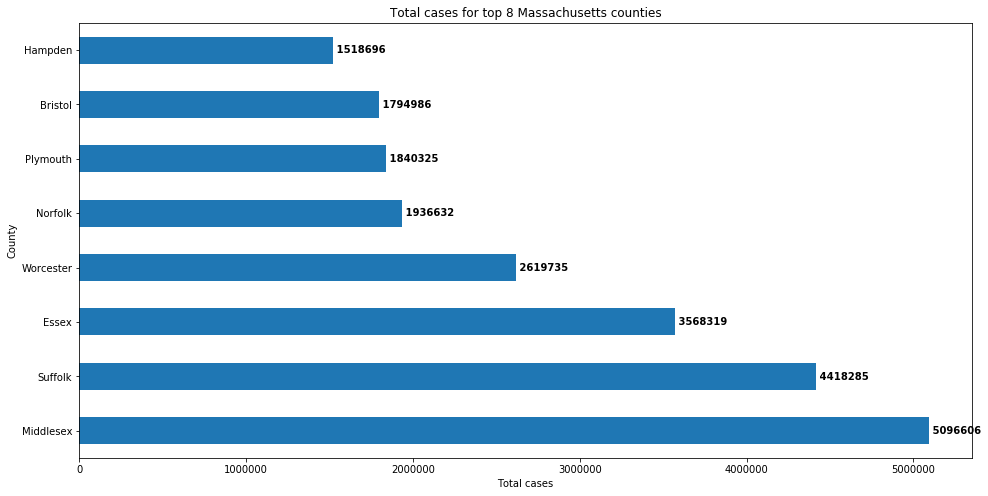

In [22]:
# Display a horizontal bar chart with title, labels, and value for each bar
barplot = top.loc[:, 'Totals'].plot(kind='barh', figsize=(16,8))
for i, v in enumerate (top.Totals):
    barplot.text(v + 3, i, " "+str(v), va='center', color='black', fontweight='bold')
plt.title('Total cases for top 8 Massachusetts counties')
plt.xlabel('Total cases')
plt.ylabel('County')